# Ad recommender:
In this notebook, I have implemented a logistic regression algorithm(pretty much from the scratch) for predicting whether a person will buy a magazine or not, based on their gender, age, salary, and earlier purchases.

In [1028]:
# Imports:
import numpy as np
import pandas as pd
# For interactive plots, change 'inline' to 'notebook'.
%matplotlib inline
from matplotlib import pyplot as plt

# Loading the dataset:
Dataset obtained from Kaggle.

In [1029]:
df = pd.read_csv('data.csv')
display(df)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## Data preprocessing:

In [1030]:
# 'User ID' is a useless feature.
df = df.drop(columns = ['User ID'])

In [1031]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

No null values are present.

In [1032]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

A value of 1 means that they have purchased the magazine.

In [1033]:
# We need numeric data.
df["Gender"].replace('Male', 0, inplace=True) # 0 is for male
df["Gender"].replace('Female', 1, inplace=True) # 1 is for female

Finally, we have 3 features.

In [1034]:
X = df[["Age", "EstimatedSalary"]] 
y = df[["Purchased"]] # Dependent variable.

# Feature scaling: Standard scaling/ Mean normalization
X = (X - X.mean())/X.std()

X = X.assign(x_0 = pd.Series(np.ones(X.shape[0])).values) # Adding the dummy column filled with ones.
X = X.assign(Gender = df[["Gender"]]) # Adding the gender column.
display(X)

,Age,EstimatedSalary,x_0,Gender
0,-1.779569,-1.488183,1.0,0
1,-0.253270,-1.458854,1.0,0
2,-1.111813,-0.784307,1.0,1
3,-1.016419,-0.373714,1.0,1
4,-1.779569,0.183521,1.0,0
...,...,...,...,...
395,0.796060,-0.842964,1.0,1
396,1.273028,-1.370870,1.0,0
397,1.177635,-1.458854,1.0,1
398,-0.157877,-1.077589,1.0,0


We have added the dummy feature column filled with ones. (To take care of $\theta _0$)

# Splitting the dataset:
We split the dataset into training and validation datasets.

In [1035]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 3:1 Ratio split.

m = X_train.shape[0] # The number of datapoints/rows.
n = X_train.shape[1] # The number of columns.

# Training:

In [1036]:
theta = np.zeros(n) # Initial value for the parameters.
#theta_temp = theta # Temporary theta required for simultaneous upgrading.

## Helper functions:

In [1037]:
# The logistic function/ sigmoid function:
def sigmoid(z):
    return np.float32(1/(1 + np.exp(-z)))

In [1038]:
# The cost function:
def cost(y, X, theta):
    s = 0
    for i in range(m):
        s = s - (1/m)*(y[i]*np.log(h(X[i], theta)) + (1 - y[i])*np.log(1 - h(X[i], theta)))
    return s

In [1039]:
# Our hypothesis function:
def h(x, theta): # Here x is a datapoint.
    return sigmoid(np.dot(x,theta))

In [1040]:
# Calculates the gradient with respect to a parameter.
def gradient(X, y, j):
    s = 0
    for i in range(m):
        s = s + (1/m)*(h(X[i], theta) - y[i])*X[i][j]
    return s

## Gradient Descent:

In [1041]:
# Converting dataframes to numpy arrays:
X_train = X_train.values 
y_train = y_train.values
X_test = X_test.values 
y_test = y_test.values
y_test = y_test.reshape(y_test.shape[0],)

In [1042]:
# GRADIENT DESCENT PARAMETERS:
N_ITER = 100 # The number of iterations.
alpha = 0.3 # The learning rate.

In [1043]:
# GRADIENT DESCENT:
costY = []
for i in range(N_ITER):
    costY.append(cost(y_train, X_train, theta))
    # Theta gets updated simultaneously in each iteration and then gets updated as a whole.
    theta = [(theta[j] - alpha*gradient(X_train, y_train, j))[0] for j in range(n)]

In [1044]:
print("The parameters are: ", theta)

The parameters are:  [1.7936195485665132, 0.9876229126705455, -0.8318873857464645, -0.2331764692016877]


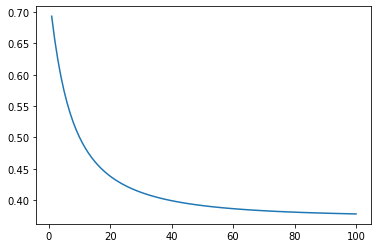

In [1045]:
# Plotting the cost function for better visualization: 
plt.plot(np.linspace(1, N_ITER, N_ITER), costY)
plt.show()

In [1046]:
predictions1 = [h(X_test[i], theta) for i in range(X_test.shape[0])]
# Cut-off set as 0.5
predictions = np.round(predictions1)

In [1047]:
# Gives us some measure of the accuracy of our model.
def score(a, b):
    return ((np.sum(a==b))/y_test.shape[0])

In [1048]:
print("The accuracy is: {:.2f}".format(score(predictions, y_test)))

The accuracy is: 0.88


In [1049]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

[[61  2]
 [10 27]]
Accuracy: 0.88


In [1050]:
# Another way to test the accuracy of our classifier:
auc = metrics.roc_auc_score(y_test, predictions1) # Note that this accepts probability predictions and not binary integer classes.
print(auc)

0.9631059631059632


AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.